## Skewness (偏態)
#### 兩種定義:
- 偏態係數(coefficient of skewness): ((平均數-中數)*3)/ 標準差
- 動差法: 偏態為三階動差(Z分數三次方的平均數) (Σ(x-μ) ** 3 / n  ) / σ ** 3     

> <font color=black size=2>skew = 0: 分布左右等重***注意: 左右等重並不代表一定為normal distribution</font>                              
> <font color=black size=2>skew > 0: 右重 > 左重</font>     
> <font color=black size=2>skew < 0: 左重 > 右重</font>     

***標準差σ意義: 與平均的平均距離

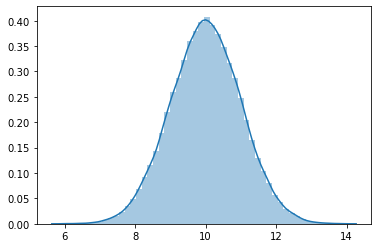

In [2]:
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns

# seaborn.distplot 算連續數值 
# seaborn.distplot(kde=True) -> 對每個數值區間(長條圖)做常態分布，最後加總，標準化成1 => kde曲線即即機率分布

# np.random.normal(loc=平均數, scale=標準差, size=樣本數)
dist = np.random.normal(loc=10, size=100000)
dist = dist[dist >= 0]
sns.distplot(dist)

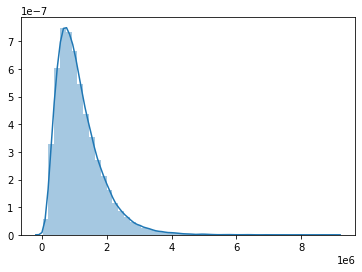

In [2]:
# 將樣本點都乘上6次方
# 次方對於大的數影響較大 -> 呈右偏
dist1 = np.power(dist, 6)
sns.distplot(dist1)

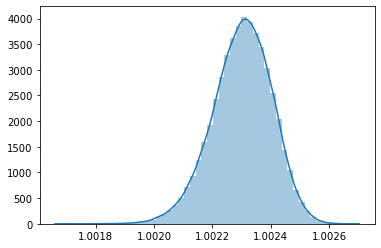

In [3]:
# 將樣本點都乘上1/1000次方 -> 呈左偏
# 左偏程度較右偏不明顯 -> 基數小、開根號最小也只會是0
dist2 = np.power(dist, 1/1000)
sns.distplot(dist2)
# 將基數(loc、scale)設越大，左偏程度就變明顯

0.17268136836703113


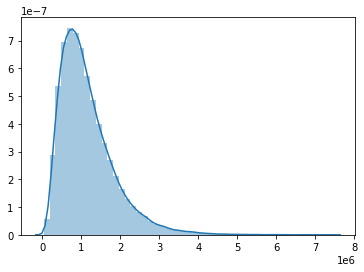

In [3]:
# dist3呈右偏
from scipy.stats import boxcox_normmax
dist3 = np.power(dist,6)

# 用boxcox_normmax找lambda
print(boxcox_normmax(dist3 + 1))
sns.distplot(dist3)
# lambda=0.17503036603042524

6.301095423982606


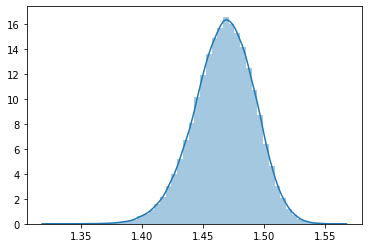

In [14]:
# dist3呈左偏
dist4 = np.power(dist, 1/6)
print(boxcox_normmax(dist4))
sns.distplot(dist4)
# lambda=6.301095423982606

0.007087085346590426


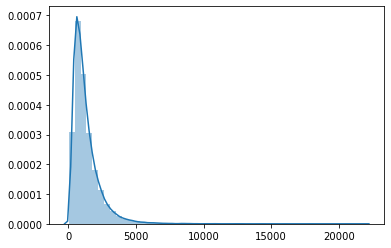

In [15]:
# 樣本點都乘上2的樣本點次方
dist5 = np.power(2, dist)
print(boxcox_normmax(dist5))
sns.distplot(dist5)
# lambda=0.007087085346590426